In [101]:
#combine CDC and flu data
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as stats

In [15]:
#load CSVs
wdf =[]
wdf = pd.read_csv("Complied_Weather.csv")
idf = pd.read_csv("Data/ILI Totals for Desired States.csv")


In [18]:
#replace wdf states with full name
wdf['State'].replace({'AZ':'Arizona','CA':'California','CO':'Colorado','GA':'Georgia','IL':'Illinois','NY':'New York',
                      'PA':'Pennsylvania','TX':'Texas','WA':'Washington'},inplace=True)

wdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_day_of_the_week  6589 non-null   object 
 1   average_temperature   6589 non-null   float64
 2   week                  6589 non-null   int64  
 3   year                  6589 non-null   int64  
 4   State                 6589 non-null   object 
 5   City                  6589 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 309.0+ KB


In [19]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545 entries, 0 to 4544
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     4545 non-null   object
 1   year      4545 non-null   int64 
 2   week      4545 non-null   int64 
 3   ILITOTAL  4545 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 142.2+ KB


In [23]:
 widf = pd.merge(idf,wdf,on=['State','week','year'])
# widf = wdf.join(idf,on=['State','week','year'],how='outer')
widf.to_csv('ILI_Totals_Weather_V1.csv',encoding='utf-8', index=False)

<ipython-input-104-cbc9228e3a9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chicago_DF['ldw_num']=Chicago_DF['last_day_of_the_week'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


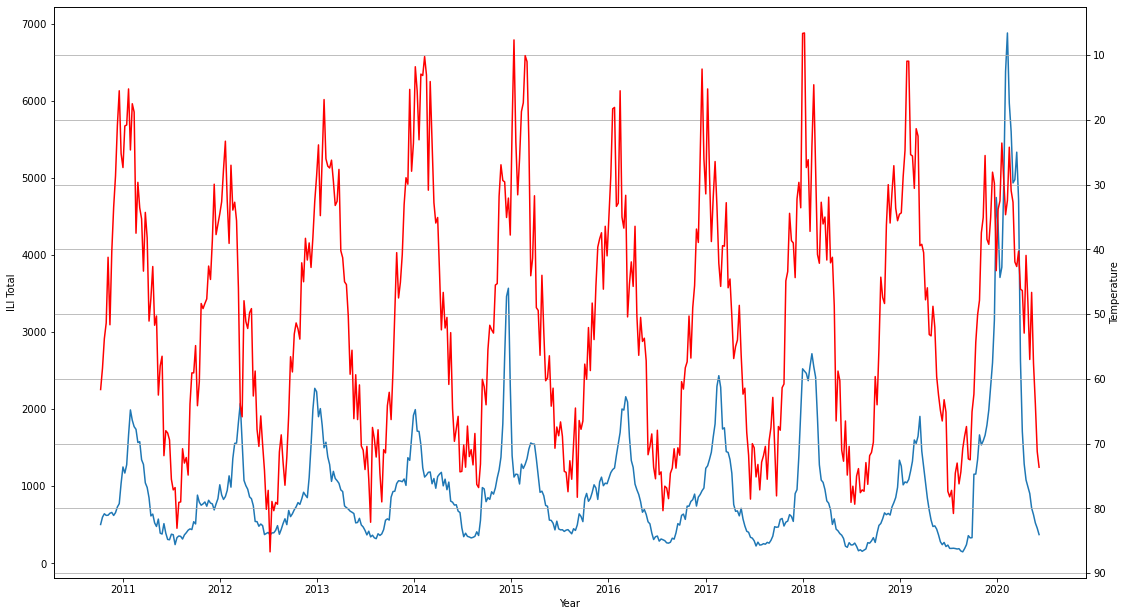

In [104]:
Chicago_DF = widf[widf['City']=='Chicago']
# Chicago_DF['last_day_of_the_week'].map(dt.datetime.toordinal)
# Chicago_DF['ldw_num']=datetime.datetime.strptime(Chicago_DF['last_day_of_the_week'],'%mm/%dd/%yy')
Chicago_DF['ldw_num']=Chicago_DF['last_day_of_the_week'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# train['date1'] = train['ID'].apply(lambda x: datetime.strptime(x, '%Y%m%d%H'))
fig, ax1 = plt.subplots()
ax1.plot(Chicago_DF['ldw_num'],Chicago_DF['ILITOTAL'])
plt.ylabel('ILI Total')
plt.xlabel('Year')
# plt.ylim((0,3000))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.plot(Chicago_DF['ldw_num'],Chicago_DF['average_temperature'], color ='red')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.gca().invert_yaxis()
plt.ylabel('Temperature')
plt.grid(True)
# Chicago_DF.info()
plt.show()


The r-squared is: 0.536442128121953


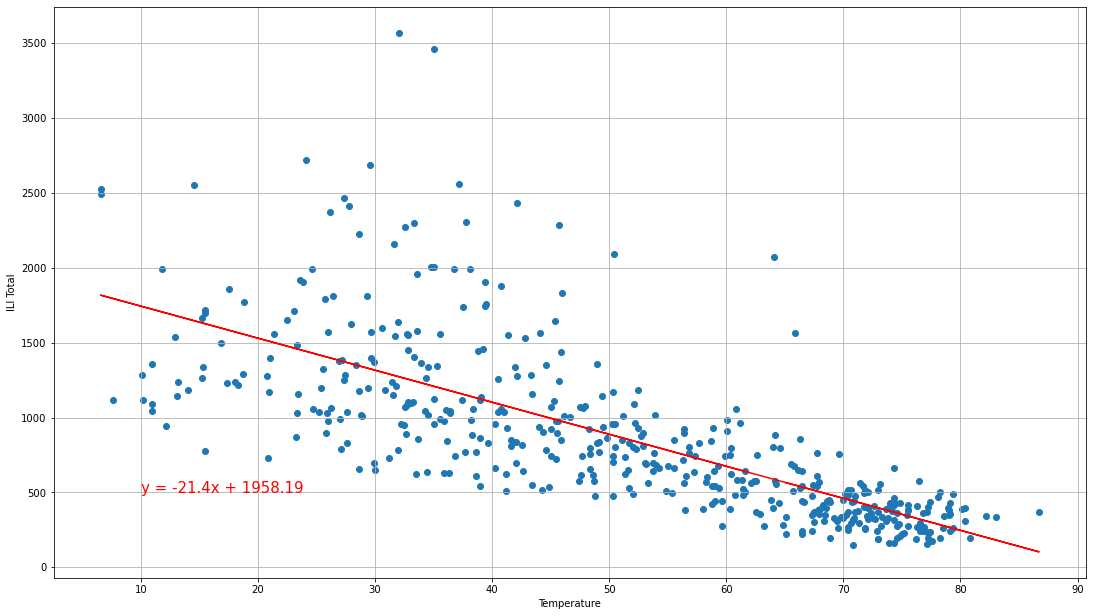

In [102]:
CDF_no2020 =Chicago_DF[Chicago_DF['ldw_num']<('2019-10-01')]

x_values = CDF_no2020['average_temperature']
y_values = CDF_no2020['ILITOTAL']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax1 = plt.subplots()
plt.scatter(CDF_no2020['average_temperature'],CDF_no2020['ILITOTAL'])
fig.set_size_inches(18.5, 10.5, forward=True)
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,500),fontsize=15,color="red")
plt.ylabel('ILI Total')
plt.xlabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [103]:
stats.ttest_ind(CDF_no2020['average_temperature'],CDF_no2020['ILITOTAL'], equal_var=False)

Ttest_indResult(statistic=-31.385453542791126, pvalue=3.2014081837628565e-117)